#📌 Extracción

In [2]:
import pandas as pd 
import json
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

#obtener datos desde la api

df_telecom = pd.read_json(url)
data = df_telecom.to_dict(orient='records')

#df_telecom.columns

df_tel = pd.json_normalize(data)

df_tel.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [3]:
df_tel

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:

# --- 4. Verificar valores únicos en columnas categóricas ---
columnas_categoricas = df_tel.select_dtypes(include='object').columns
nombres = df_tel.select_dtypes(include='object').columns #Selecciona solo las columnas del DataFrame df_tel que tienen tipo de dato object.
#print(nombres)
# print("\n🔍 Valores únicos en columnas categóricas (posibles inconsistencias):")




for col in columnas_categoricas:
    print(f"\n🧾 {col}:")
    print(df_tel[col].unique())


#Verificar Valores Ausentes
print(df_tel.isnull().sum())
#Verificar Duplicados
print(df_tel.duplicated().sum())
#Verificar tipos de datos y posibles errores de formato
print("\n🔍 Tipos de datos por columna:")
df_tel = df_tel[df_tel['Churn'].str.strip() != '']
#Cambiando la columna "account.Charges.Total" a Float

df_tel['account.Charges.Total'] = pd.to_numeric(df_tel['account.Charges.Total'], errors='coerce')
print(df_tel['account.Charges.Total'].dtype)

# Vacíos o en blanco
df_tel.apply(lambda x: x.astype(str).str.strip() == '').sum()
df_tel




df_tel['cuentas_diarias'] = (df_tel['account.Charges.Monthly'] / 30)
df_tel = df_tel.drop('Cuentas_Diarias', errors='ignore')
df_tel



🧾 customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

🧾 Churn:
['No' 'Yes' '']

🧾 customer.gender:
['Female' 'Male']

🧾 customer.Partner:
['Yes' 'No']

🧾 customer.Dependents:
['Yes' 'No']

🧾 phone.PhoneService:
['Yes' 'No']

🧾 phone.MultipleLines:
['No' 'Yes' 'No phone service']

🧾 internet.InternetService:
['DSL' 'Fiber optic' 'No']

🧾 internet.OnlineSecurity:
['No' 'Yes' 'No internet service']

🧾 internet.OnlineBackup:
['Yes' 'No' 'No internet service']

🧾 internet.DeviceProtection:
['No' 'Yes' 'No internet service']

🧾 internet.TechSupport:
['Yes' 'No' 'No internet service']

🧾 internet.StreamingTV:
['Yes' 'No' 'No internet service']

🧾 internet.StreamingMovies:
['No' 'Yes' 'No internet service']

🧾 account.Contract:
['One year' 'Month-to-month' 'Two year']

🧾 account.PaperlessBilling:
['Yes' 'No']

🧾 account.PaymentMethod:
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

🧾 account.Charges.Tota

C:\Users\aluna\AppData\Local\Temp\ipykernel_1124\1289057232.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tel['account.Charges.Total'] = pd.to_numeric(df_tel['account.Charges.Total'], errors='coerce')
C:\Users\aluna\AppData\Local\Temp\ipykernel_1124\1289057232.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tel['cuentas_diarias'] = (df_tel['account.Charges.Monthly'] / 30)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#Estandarización y transformación de datos (opcional)

In [5]:
columnas_booleanas = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.MultipleLines', 'internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.PaperlessBilling']
df_tel[columnas_booleanas] = df_tel[columnas_booleanas].replace({'Yes': True, 'No': False})
df_tel[columnas_booleanas] = df_tel[columnas_booleanas].astype(bool)
df_tel[columnas_booleanas] = df_tel[columnas_booleanas].astype(int)
df_tel




,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,Yes,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,Yes,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,Yes,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,Yes,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,Yes,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [6]:
df_tel.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.MultipleLines,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.518671,0.560557,0.506886,0.601022,0.604572,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.499687,0.496355,0.499988,0.489723,0.488977,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


#📄Distribución de evasión

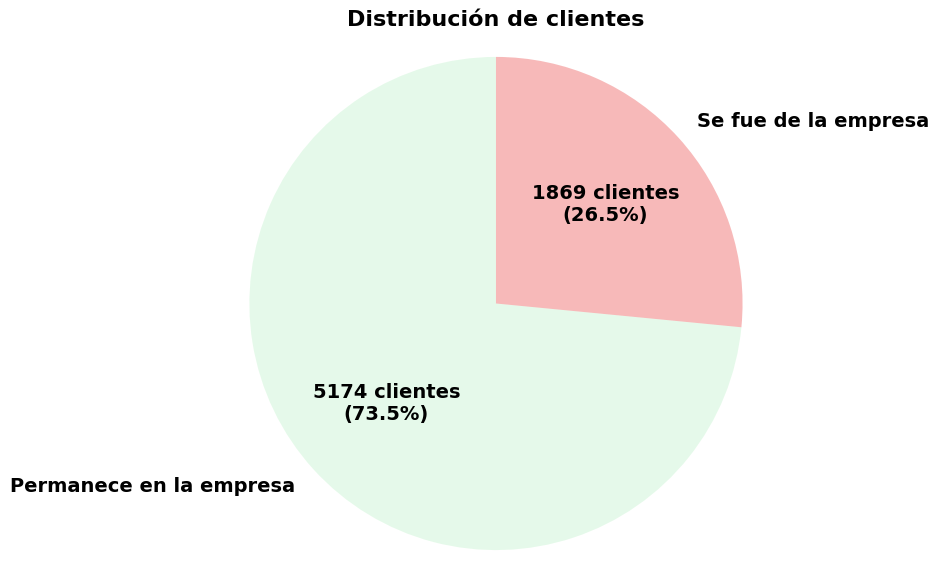

In [7]:

import matplotlib.pyplot as plt


labels_map = {0: 'Permanece en la empresa', 1: 'Se fue de la empresa'}
churn_mapeado = df_tel['Churn'].map(labels_map)
conteo = churn_mapeado.value_counts()

colores = [
    (0.0, 0.8, 0.2, 0.1),
    (0.9, 0.1, 0.1, 0.3)
]

plt.figure(figsize=(7, 7))
plt.pie(
    conteo,
    labels=conteo.index,
    colors=colores,
    startangle=90,
    autopct=lambda p: f'{int(round(p * sum(conteo) / 100))} clientes\n({p:.1f}%)',
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)

plt.title('Distribución de clientes', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

#Recuento de la evasión por variables categóricas

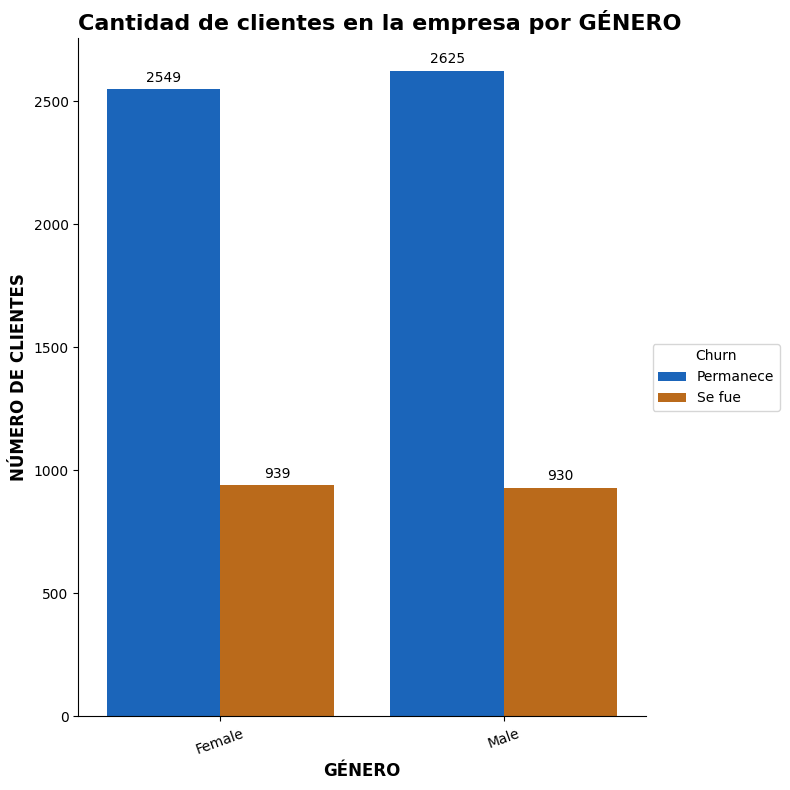

In [8]:
import seaborn as sns

conteo_contrato = df_tel.groupby(['customer.gender','Churn']).size().reset_index(name='Total')

palette = {
    'Permanece': '#0063d5',
    'Se fue': '#d56a00'
}

conteo_contrato['Churn'] = conteo_contrato['Churn'].map({0: 'Permanece', 1: 'Se fue'})

fig, ax = plt.subplots(figsize=(8, 8))
sns.despine()

sns.barplot(
    data=conteo_contrato,
    x='customer.gender',
    y='Total',
    hue='Churn',
    palette=palette,
    ax=ax
)

ax.set_title('Cantidad de clientes en la empresa por GÉNERO', fontsize=16, loc='left', fontweight='bold')
ax.set_xlabel('GÉNERO', fontsize=12, fontweight='bold')
ax.set_ylabel('NÚMERO DE CLIENTES', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=20)
ax.legend(title='Churn', loc='center left', bbox_to_anchor=(1, 0.5))

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

#Conteo de evasión por variables numéricas

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

palette = {
    0: '#8A2BE2',
    1: '#FFD700'
}

colores_lineas = {
    'Mediana churn=0': '#000000',
    'Media churn=0': '#00FF00',
    'Mediana churn=1': '#FF0000',
    'Media churn=1': '#00FFFF'
}

nombres_ejes = {
    'meses_de_contrato': 'MESES DE CONTRATO',
    'cargos_mensuales': 'CARGOS MENSUALES',
    'cargos_totales': 'CARGOS TOTALES'
}

def graficar_distribucion_numericas(df_tel,columnas):
    df_temp = df_tel.copy()

    for col in columnas:
        nombre_legible = nombres_ejes.get(col, col.capitalize())

        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 5))
        sns.despine()

        # BOXPLOT
        sns.boxplot(
            data=df_temp,
            x='Churn',
            y=col,
            hue='Churn',
            palette=palette,
            ax=axes[0],
            legend=False
        )

        mediana = df_temp.groupby('Churn')[col].median()
        media = df_temp.groupby('Churn')[col].mean()

        for estado in [0, 1]:
          label_mediana = f'Mediana churn={estado}'
          label_media = f'Media churn={estado}'

          axes[0].axhline(
              y=mediana[estado],
              color=colores_lineas[label_mediana],
              linestyle='--',
              linewidth=2,
              alpha=0.9,
              label=label_mediana
              )
          axes[0].axhline(
              y=media[estado],
              color=colores_lineas[label_media],
              linestyle='-',
              linewidth=2,
              alpha=0.9,
              label=label_media
              )
          axes[0].legend(framealpha=0.5, fontsize=8, loc='upper center')

        axes[0].set_title(f'BOXPLOT DE {nombre_legible}', fontsize=13, fontweight='bold')
        axes[0].set_xlabel('ESTADO DE CLIENTE', fontsize=10, fontweight='bold')
        axes[0].set_ylabel(nombre_legible, fontsize=10, fontweight='bold')

        # VIOLIN PLOT
        sns.violinplot(
            data=df_temp,
            x='Churn',
            y=col,
            hue='Churn',
            palette=palette,
            ax=axes[1],
            legend=False
        )

        for estado in [0, 1]:
          label_mediana = f'Mediana churn={estado}'
          label_media = f'Media churn={estado}'

          axes[1].axhline(
              y=mediana[estado],
              color=colores_lineas[label_mediana],
              linestyle='--',
              linewidth=2,
              alpha=0.9,
              label=label_mediana
              )
          axes[1].axhline(
              y=media[estado],
              color=colores_lineas[label_media],
              linestyle='-',
              linewidth=2,
              alpha=0.9,
              label=label_media
              )
          axes[1].legend(framealpha=0.5, fontsize=8, loc='upper center')

        axes[1].set_title(f'VIOLIN PLOT DE {nombre_legible}', fontsize=13, fontweight='bold')
        axes[1].set_xlabel('ESTADO DE CLIENTE', fontsize=10, fontweight='bold')
        axes[1].set_ylabel(nombre_legible, fontsize=10, fontweight='bold')

        # KDE
        for estado, label in zip([0, 1], ['Permanece', 'Se fue']):
            subset = df_temp[df_temp['Churn'] == estado]
            sns.kdeplot(
                subset[col].astype(float),
                fill=True,
                label=label,
                ax=axes[2],
                color=palette[estado],
                alpha=0.8,
                linewidth=2
            )

        axes[2].set_title(f'DISTRIBUCIÓN KDE de {nombre_legible}', fontsize=13, fontweight='bold')
        axes[2].set_xlabel(nombre_legible, fontsize=10, fontweight='bold')
        axes[2].set_ylabel('DENSIDAD', fontsize=10, fontweight='bold')
        axes[2].legend(title='Churn')

        plt.tight_layout()
        plt.subplots_adjust(bottom=0.15)
        plt.show()
        


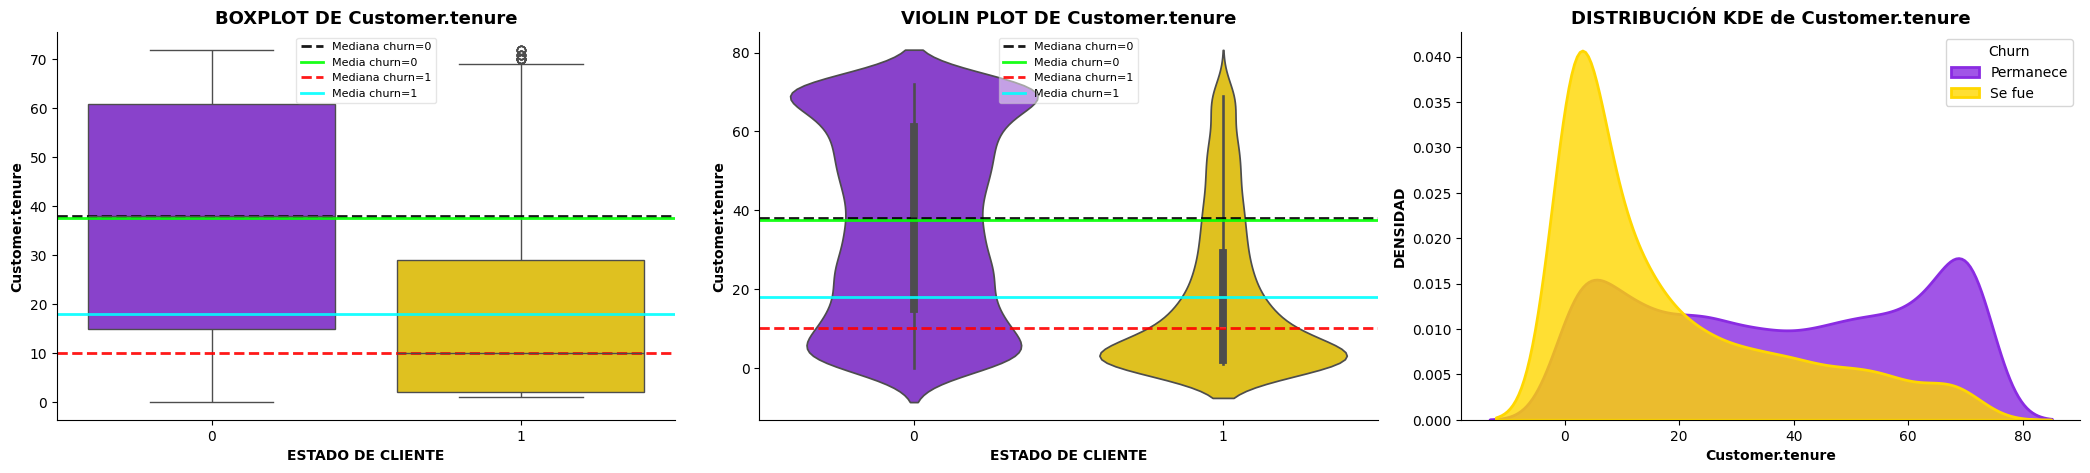

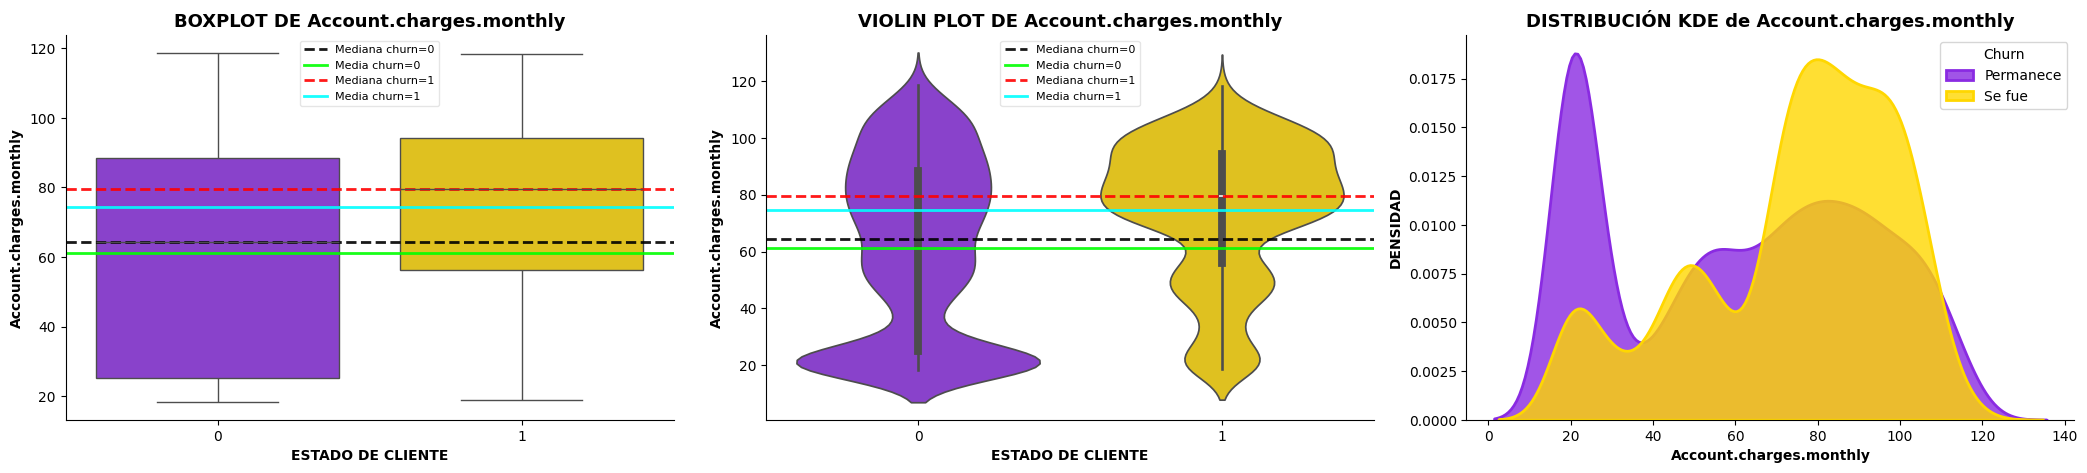

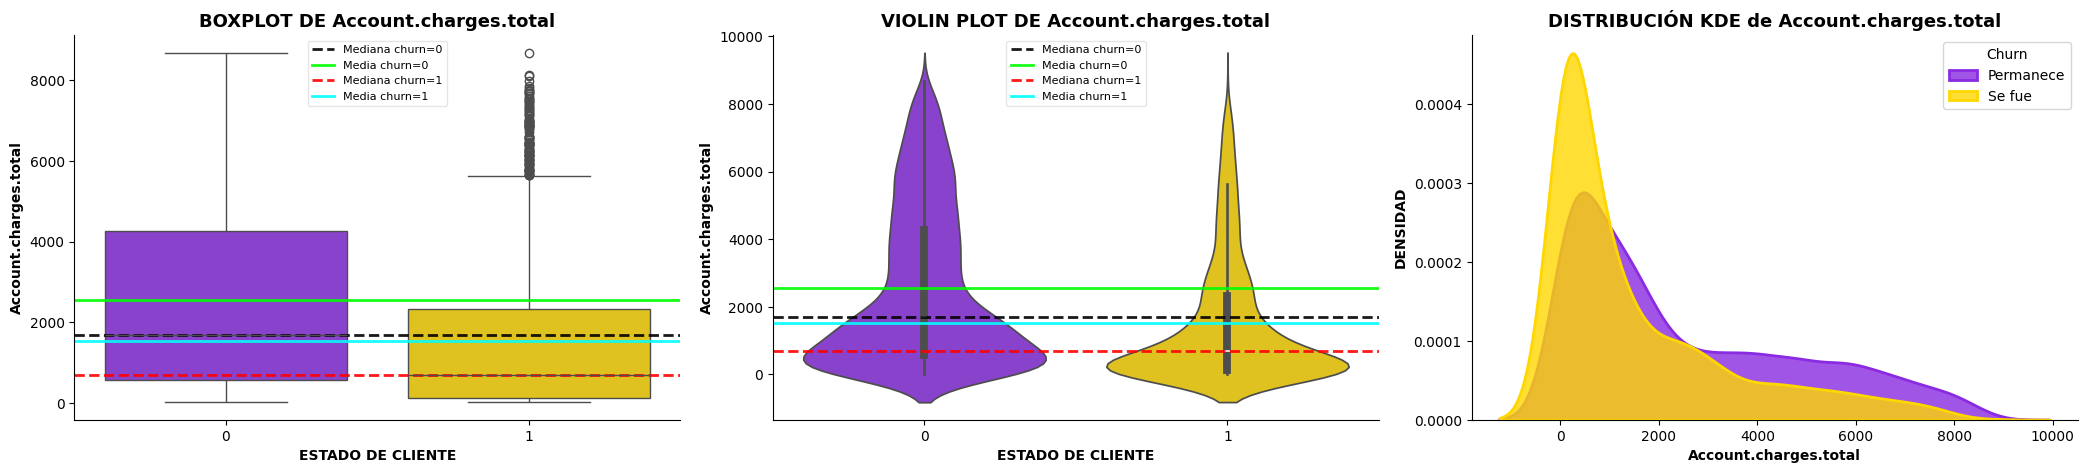

In [11]:
columnas_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
graficar_distribucion_numericas(df_tel, columnas_numericas)

🔗 Análisis de correlación

In [12]:
import plotly.express as px

fig = px.strip(
    df_tel,
    x="Churn",
    y="cuentas_diarias",
    color="Churn",
    color_discrete_map={0: '#0083d5', 1: '#d56e00'},
    title="RELACIÓN ENTRE LAS CUENTAS DIARAS Y EL ESTADO DEL CLIENTE",
    stripmode='overlay',
    labels={'churn': 'ESTADO DEL CLIENTE', 'cuentas_diarias': 'CUENTAS DIARIAS'}
)
fig.show()

#  Gráfico de la relación entre la cantidad de servicios y el estado del cliente

In [14]:
columnas_servicios = [
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection','internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]

servicios_binarios = df_tel[columnas_servicios].apply(lambda col: ((col == 'Yes') | (col == 'DSL') | (col == 'Fiber optic') | (col == 1))).astype(int)

df_tel['cantidad_servicios'] = servicios_binarios.sum(axis=1)

fig = px.box(
    df_tel,
    x="Churn",
    y="cantidad_servicios",
    color="Churn",
    color_discrete_map={0: '#0083d5', 1: '#d56e00'},
    title="RELACIÓN ENTRE LA CANTIDAD DE SERVICIOS Y EL ESTADO DEL CLIENTE",
    labels={'Churn': 'ESTADO DEL CLIENTE', 'cantidad_servicios': 'CANTIDAD DE SERVICIOS'}
)
fig.show()

#Realizando una matriz de correlación

In [15]:
import plotly.express as px

columnas_numericas = [
    'customer.tenure',
    'account.Charges.Total',
    'cuentas_diarias',
    'Churn'
]

correlaciones = df_tel[columnas_numericas].corr()
orden = correlaciones['Churn'].abs().sort_values(ascending=False).index.tolist()
correlaciones_ordenadas = correlaciones.loc[orden, orden]

fig = px.imshow(
    correlaciones_ordenadas,
    text_auto=".2f",
    aspect="auto",
    color_continuous_scale="Aggrnyl",
    title="MATRIZ DE CORRELACIÓN",
)

fig.update_layout(margin=dict(l=40, r=40, t=40, b=40))
fig.show()

     

📄 Informe final

🔹 Introducción:

Este informe enmarca el proyecto de Telecom X, una empresa que enfrenta una alarmante tasa de cancelaciones de su clientela. El objetivo principal del análisis es comprender los factores que influyen en la tasa de evasión y aportar información que permita diseñar modelos predictivos y emprender acciones concretas de forma estratégica para mejorar la retención de clientes.

El proyecto se desarrolló con un proceso ETL para garantizar datos limpios y estructurados. A través de un Análisis Exploratorio de Datos (EDA) se identificaron patrones, correlaciones e indicadores de riesgo de abandono.

🔹 Limpieza y Tratamiento de datos:

Primero se descargaron los archivos una API y luego fueron importados mediante un lector de archivos JSON utilizando Pandas. Como resultado se obtuvo un DataFrame sin datos procesados.

El 2do paso fue limpiar y tratar el DataFrame mediante diferentes métodos. Uno de ellos fue el tratamiento por datos nulos y datos duplicados, los cuales dieron sus resultados, se eliminaron 11 filas con valores faltantes irreparables para que el análisis sea consistente y se reemplazaron 224 filas con el valor de 'Yes' para que la EDA tuviera suficiente información para la investigación.

Se renombraron las columnas al español para facilitar el manejo del DataFrame, lo que también mejora la comunicación con equipos no técnicos. Como varias estaban en formato 'object', se verificó su tipo de dato para su correcta conversión. Algunas fueron transformadas al tipo de dato 'int64' para una fácil interpretación. Otras fueron transformadas al tipo 'str' pero conservaron el tipo 'object' ya que Pandas lo define como una cadena de texto. Por último, algunas fueron transformadas al tipo de dato 'float64' para realizar cálculos. Además se tradujeron algunas palabras de las filas para mejor interpretación.

Por último, se generaró una nueva columna para calcular el valor diario de cada cliente para ofrecer una mejor perspectiva analítica.

🔹 Análisis Exploratorio de Datos:

Como primera medida, se realizó un análisis descriptivo a los datos al calcular algunas métricas como la media, la mediana, la desviación estándar, entre otras. Esto ayudó a comprender mejor la distribución y el comportamiento de los clientes. Para los gráficos se usó matplotlob y seaborn.

Luego se hizo un gráfico de torta (Pie) para ver cómo se distribuía la variable "churn" (evasión) de los clientes, donde se reveló una tasa de churn del 28.8%. Y tras utilizar un gráfico de barras y un gráfico de barras horizontal, se llegó a la conclusión de que más de la mitad de los clientes tienen contratos a corto plazo, además de que la mayoría solo contrata los servicios básicos (teléfono e Internet), pero no contrata servicios adicionales.

Tras hacer un Boxplot, un Violinplot y un KDE, se descubrió que: la duración del contrato es un fuerte indicador de fidelidad ya que los clientes que se van lo hacen mayormente en los primeros 12 meses. Además, los cargos mensuales altos están asociados a mayor riesgo de fuga porque es posible que los clientes perciban que el servicio no justifica el costo o que sea muy excesivo.

Después se realizó un análisis de correlación para identificar qué factores tienen mayor relación con la evasión de clientes. Para esto se utilizaron gráficos interactivos con Plotly y una matriz de correlación de datos.

🔹 Hallazgos clave:

El 28.8% de los clientes abandonaron la empresa.
La duración del contrato es el factor más fuertemente asociado con la retención.
Cargos mensuales elevados incrementan ligeramente la probabilidad de fuga.
Los clientes que contratan más servicios generan más ingresos, pero no necesariamente permanecen más tiempo.
La mayoría de las bajas se concentran en los primeros 12 meses.
🔹 Conclusión:

Una vez realizado el exhaustivo análisis exploratorio de datos, puedo llegar a la conclusión de que el número de servicios que un cliente contrata, por sí solo, no parece ser un factor determinante para que se quede o se vaya, así que ofrecer más servicios no garantiza directamente la retención. Por lo que el contrato y el costo de esos servicios son más importantes. A continuación doy los detalles:

Dado que la correlación es negativa entre 'churn' y 'meses de contrato' y la más fuerte, significa que a medida que aumenta la cantidad de meses que un cliente permanece con la empresa, la probabilidad de que cancele su servicio disminuye, por lo que la lealtad y retención aumentan con el tiempo. Por eso los primeros meses de un cliente en la empresa son los más críticos.

Los clientes con cargos mensuales más altos tienen una ligera tendencia a cancelar más el servicio. Porque aunque no es el factor principal, el precio mensual es relevante. Ya sean aumentos de precios o tarifas altas, estas podrían contribuir al abandono.

A pesar de que los cargos totales altos podrían indicar un gasto excesivo y un motivo de fuga, en realidad tiene su justificación. La fuerte influencia de los meses de contrato provocan que los clientes que acumularon cargos totales elevados son en su mayoría de larga permanencia. Por lo que el valor total de un cliente a lo largo del tiempo es un indicador de lealtad al igual que el contrato.

A medida que un cliente contrata más servicios, sus cargos mensuales y diarios aumentan de forma directamente proporcional. Por lo que se confirma que la estrategia de venta cruzada es efectiva para aumentar el ingreso por usuario.

Por último, los cargos totales acumulados por un cliente están fuertemente ligados tanto al número de servicios que tiene como, sobre todo, al tiempo que lleva en la compañía. Así que el valor de vida del cliente se impulsa por la longevidad y la profundidad del servicio.

🔹 Recomendaciones:

Tras mi conclusión, recomiendo identificar que clientes tienen una mayor tendencia a irse en base a los datos analizados y así ofrecerles una bonificación extra si mantienen el contrato a largo plazo.

Como ya vimos, el factor más importante para reducir la probabilidad del abandono es la duración del contrato. Sería bueno sacar promociones que motiven a más clientes a tomar el contrato por 1 año o 2 años en vez del contrato mes a mes, por ejemplo: Sacar un descuento importante mientras más tiempo se queden en la empresa, o sacar un beneficio del cliente mientras más servicios contrate.

Dado que la fuga ocurre en los primeros meses, recomendaría implementar unos programas de bienvenida muy robustos, y que hayan varias llamadas de seguimiento y encuestas de satisfacción en los servicios para abordar cualquier incoveniente que tenga el cliente, además de asegurar que sus planes de servicio se alineen con su uso intensivo. Así la calidad de atención al cliente mejora y lo motivaría a quedarse.

Otra recomendación sería revisar el costo de los servicios, ya que los cargos mensuales y diarios más altos están levemente asociados con una mayor fuga. Dado que los clientes con más servicios generan lógicamente más ingresos recurrentes pero a su vez tienen un mayor gasto, sería bueno sacar packs de ofertas donde el costo por adquirir esos servicios sea mucho menor si se contrata el pack completo, eso motivaría a la clientela a pagar el pack que contiene más servicios a un menor precio que contratar de forma individual.

También recomendaría investigar las razones del porqué la facturación sin papel tiene mayor tendencia al abandono. Se debe mejorar la experiencia digital y ofrecer canales de soporte eficientes para retener a los clientes que prefieran ese formato, así como una mejora en la calidad de la Fibra Óptica en servicio de Internet y promover activamente los métodos de pago de transferencia bancaria y tarjeta de crédito.

Por último, dado que el 28.8% de los clientes ya han abandonado la empresa, es fundamental implementar estas estrategias de forma inmediata para evitar una pérdida aún mayor de la base de usuarios y, por lo tanto, pérdidas más significativas.

🔹 Final:

Todo este análisis permite sentar las bases para un sistema de predicción del abandono, optimización de ofertas y retención inteligente de clientes en función del tiempo de su contrato, su comportamiento y los servicios que decidan contratar en la empresa.